In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
RawData = pd.read_csv("/content/drive/MyDrive/Medical Insurance Cost/medical_insurance.csv")
y = RawData['charges']
x = RawData.drop(columns=['charges'])
RawData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Response Exploration

In [82]:
def col_range(series):
  return np.min(series), np.max(series)

def col_range_int(series):
  return int(np.min(series)), int(np.max(series))

In [92]:
print("Range:", col_range_int(y))
print("Mean:", int(np.mean(y)))
print("Median:", int(np.median(y)))
print("Standard Deviation:", int(np.std(y)))

Range: (1121, 63770)
Mean: 13261
Median: 9333
Standard Deviation: 12149


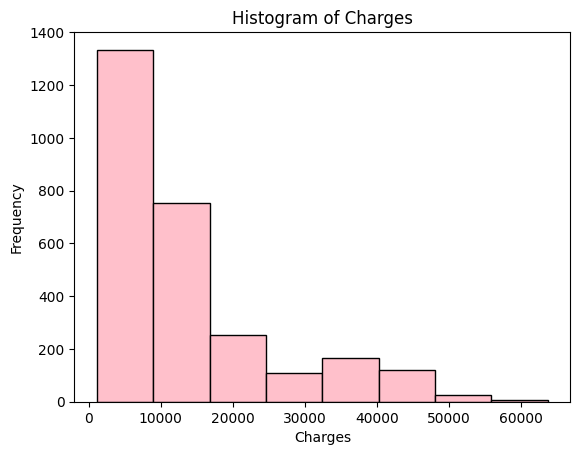

In [35]:
plt.hist(y, bins=8, color='pink', edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')

plt.show()

# Predictor Exploration

### Age

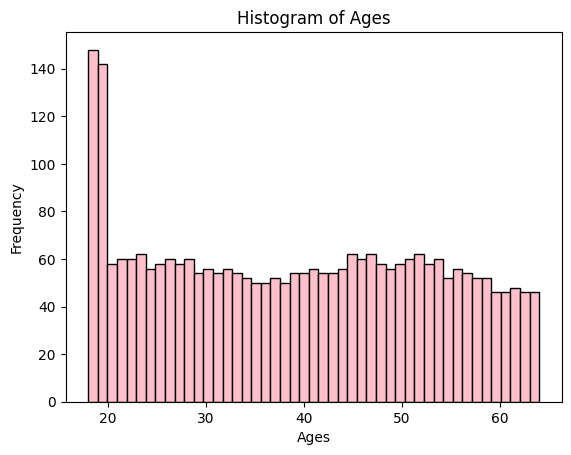


 Range: (18, 64)


In [86]:
plt.hist(x["age"], bins=len(x["age"].unique()), color='pink', edgecolor='black')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')

plt.show()

print("\n Range:", col_range_int(x["age"]))

### Sex

In [104]:
x['sex'].name

'sex'

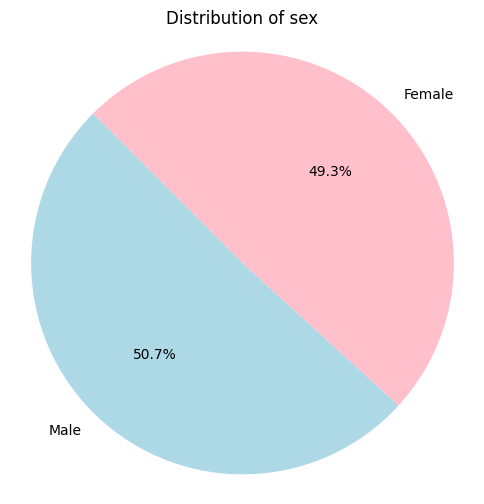


Number of Male: 1406
Number of Female: 1366


In [126]:
x['sex'] = x['sex'].str.capitalize()

def binary_data(data, color1, color2, angle):
  binary_counts = data.value_counts()

  plt.figure(figsize=(6, 6))
  plt.pie(binary_counts, labels=binary_counts.index, autopct='%1.1f%%',
          startangle=angle, colors=[color1, color2])
  plt.title('Distribution of '+ str(data.name))
  plt.axis('equal')                                                   # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()
  print("")                                                           # spacing

  for category in binary_counts.index:
    print("Number of {}: {}".format(category, binary_counts[category]))



binary_data(x['sex'], 'lightblue', 'pink', 135)


### BMI

In [98]:
print("Range:", col_range(x["bmi"]))

print("Mean:", np.round(np.mean(x["bmi"]),2))
print("Median:", np.round(np.median(x["bmi"]),2))
print("Standard Deviation:", np.round(np.std(x["bmi"]),2))

Range: (15.96, 53.13)
Mean: 30.7
Median: 30.45
Standard Deviation: 6.13


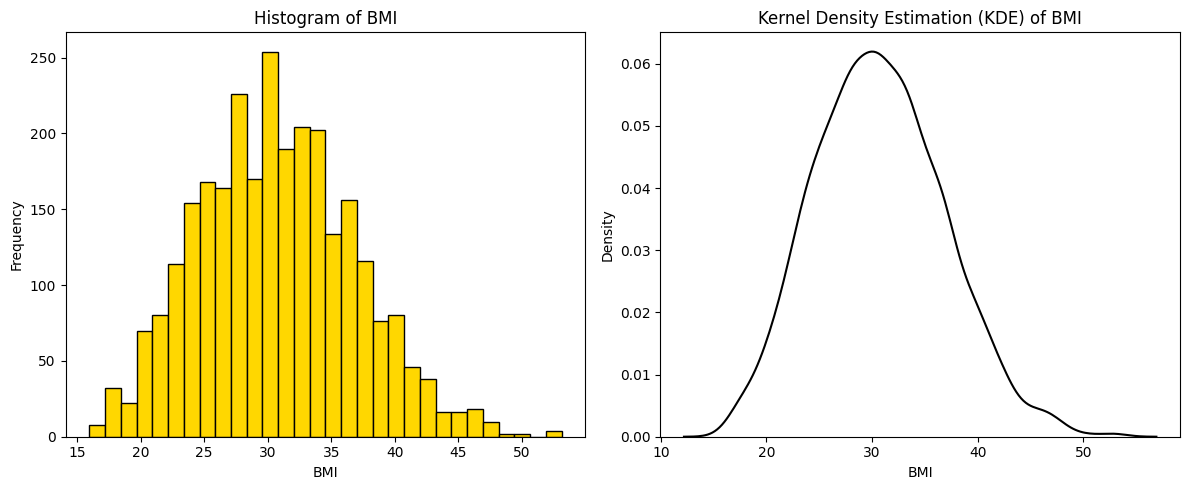

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(x['bmi'], bins=30, color='gold', edgecolor='black')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of BMI')

sns.kdeplot(x['bmi'], color='black', ax=axes[1])
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Density')
axes[1].set_title('Kernel Density Estimation (KDE) of BMI')

plt.tight_layout()
plt.show()


### Children

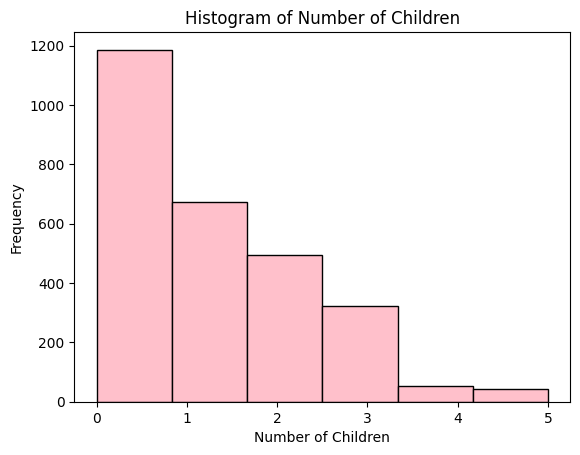


 Range: (0, 5)


In [102]:
plt.hist(x["children"], bins=len(x["children"].unique()), color='pink', edgecolor='black')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Children')

plt.show()

print("\n Range:", col_range_int(x["children"]))


### Smoker

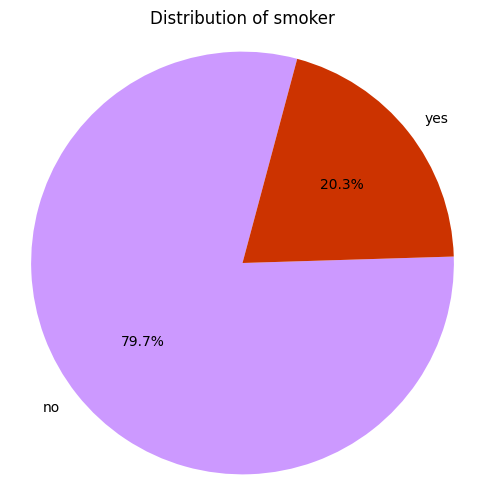


Number of no: 2208
Number of yes: 564


In [127]:
binary_data(x['smoker'], '#cc99FF', '#cc3300', 75)

### Region

In [134]:
x['region'] = x['region'].str.capitalize()
region_counts = x['region'].value_counts()

for region in region_counts.index:
    print("Number of {}s: {}".format(region, region_counts[region]))

Number of Southeasts: 766
Number of Southwests: 684
Number of Northwests: 664
Number of Northeasts: 658


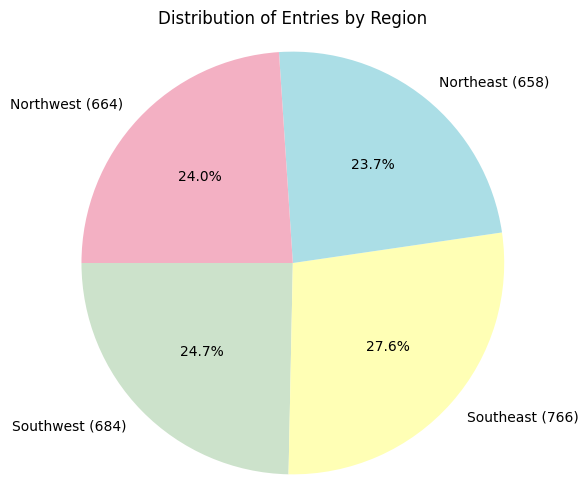

In [151]:
region_counts = region_counts.reindex(['Southwest', 'Southeast', 'Northeast', 'Northwest'])
plt.figure(figsize=(6, 6))
plt.pie(region_counts, labels=['{} ({})'.format(region, count) for region, count in zip(region_counts.index, region_counts)],
        autopct='%1.1f%%', startangle=180, colors=["#CCE2CB", "#FFFFB5", "#ABDEE6", "#F3B0C3"])
plt.title('Distribution of Entries by Region')
plt.axis('equal')

plt.show()